In [1]:
import numpy as np
p1=np.array([1,1])
p2=np.array([4,4])

In [3]:
np.sqrt(np.sum(np.power(p1-p2, 2))) #euclidian distance

4.242640687119285

In [4]:
def distance(p1,p2):
    return np.sqrt(np.sum(np.power(p1-p2, 2)))

In [10]:
def majority_vote(votes):
    vote_counts=dict()
    for vote in votes:
        if(vote in vote_counts):
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1
    return vote_counts

In [15]:
vote_counts=majority_vote([1,2,3,1,2,3,3,3,3,2,2])

In [16]:
max(vote_counts)

3

In [20]:
max_counts=max(vote_counts.values())
max_counts

5

In [21]:
for vote,count in vote_counts.items():
    print(vote,count)

1 2
2 4
3 5


In [22]:
winners=[]
max_counts=max(vote_counts.values())

for vote,count in vote_counts.items():
    if(count==max_counts):
        winners.append(vote)

In [23]:
winners

[3]

In [24]:
import random

In [35]:
def majority_vote(votes):
    vote_counts=dict()
    for vote in votes:
        if(vote in vote_counts):
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1

    winners=[]
    max_counts=max(vote_counts.values())
    for vote,count in vote_counts.items():
        if(count==max_counts):
            winners.append(vote)
    return random.choice(winners) #if more than one (tie), then choose one at random

In [39]:
majority_vote([1,1,1,1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6])

5

In [74]:
#MUCH EASIER WAY
import scipy.stats as ss
def smajority_vote(votes):
    """Returns the most common element in array"""
    mode, count=ss.mstats.mode(votes)
    return mode #Doesn't pick one randomly when tied though

In [43]:
smajority_vote([1,1,1,1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6])

array([5.])

In [44]:
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [45]:
p=np.array([2.5,2])

[0.5, 3.5, 0.5, 3.5]

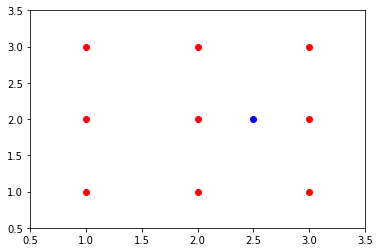

In [50]:
import matplotlib.pyplot as plt
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [52]:
distances=np.zeros(points.shape[0])

In [53]:
for i in range(len(distances)):
    distances[i]=distance(p,points[i])

In [54]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [58]:
ind=np.argsort(distances) #gives indicies in order of what would sort the array in ascending order

In [59]:
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [60]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [63]:
distances[ind[:2]]

array([0.5, 0.5])

In [67]:
def find_nearest_neighbours(p, points, k=5):
    distances=np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances)
    return ind[:k]

In [68]:
find_nearest_neighbours(p,points,5)

array([4, 7, 3, 5, 6], dtype=int64)

In [69]:
print(points[find_nearest_neighbours(p,points,5)])

[[2 2]
 [3 2]
 [2 1]
 [2 3]
 [3 1]]


In [70]:
print(points[find_nearest_neighbours(p,points,2)])

[[2 2]
 [3 2]]


In [75]:
def knn_predict(p, points, outcomes, k=5):
    ind=find_nearest_neighbours(p,points,k)
    return smajority_vote(outcomes[ind])   

In [76]:
outcomes=np.array([0,0,0,0,1,1,1,1,1])

In [77]:
knn_predict(p, points, outcomes, 5)

array([1.])

In [80]:
knn_predict(np.array([2.5,2.7]), points, outcomes, 2)

array([1.])

In [85]:
ss.norm(0,1).rvs((5,2)) #there are 5 points here gained from synthetic data of a normal distribution belonging to class 0.

array([[ 0.59533791,  0.2725601 ],
       [-0.88090655, -0.2173308 ],
       [ 0.47718066,  0.81313075],
       [-0.86560414,  0.35594462],
       [-0.11397908, -0.08393165]])

In [87]:
ss.norm(1,1).rvs((5,2))  #there are 5 points here gained from synthetic data of a normal distribution belonging to class 1.

array([[ 1.9628687 , -0.93082539],
       [ 0.32718661,  0.35306878],
       [-1.52795769,  0.3512431 ],
       [ 0.49193166,  0.65080292],
       [ 0.97353876,  1.95738988]])

In [90]:
np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))), axis=0) #doing this to get 10 points for doing knn.

array([[-0.74091342,  0.15795285],
       [ 1.15485139,  0.31077266],
       [ 2.38524707,  0.74679863],
       [-0.86130864, -0.39066674],
       [-0.01047495,  0.54835484],
       [ 1.26865412,  1.41632812],
       [-0.48083304,  1.89685135],
       [ 1.16772512,  0.48528702],
       [ 1.51444373,  0.15057346],
       [ 0.34050677,  1.54053185]])

In [94]:
def generate_synth_data(n=50):
    """Creates two sets of points from bivariate normal distubution and has a np array to assign each of those points to their outcomes"""
    points= np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes= np.concatenate((np.repeat(0,n),np.repeat(1,n))) #the outcomes array where class 0 is n times and cl. 2 is n times.
    return (points,outcomes)

In [95]:
(points, outcomes)= generate_synth_data(20)

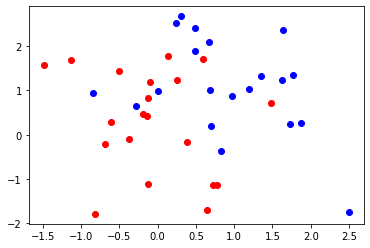

In [97]:
n=20
plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")

In [137]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    '''Classify each point on the prediction grid.'''
    (x_min, x_max, y_min, y_max)=limits
    xs=np.arange(x_min, x_max, h) #x values of grid
    ys=np.arange(y_min, y_max, h) #y valus of grid
    xx,yy=np.meshgrid(xs,ys) #returns a matrices of x values for each grid point then of y values for each grid point.
    prediction_grid=np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs): #enumerate allows access to 2 elements- different elements as well as index
        for j,y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]= knn_predict(p, predictors, outcomes, k) #[j,i] since [rows, columns] 
    return xx,yy,prediction_grid

In [138]:
xs=np.arange(1, 6, 2) 
ys=np.arange(1, 6, 2) 
xx,yy=np.meshgrid(xs,ys)

In [139]:
xx,yy

(array([[1, 3, 5],
        [1, 3, 5],
        [1, 3, 5]]),
 array([[1, 1, 1],
        [3, 3, 3],
        [5, 5, 5]]))

In [140]:
seasons=['summer','winter','fall','spring']

In [141]:
list(enumerate(seasons))

[(0, 'summer'), (1, 'winter'), (2, 'fall'), (3, 'spring')]

In [142]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

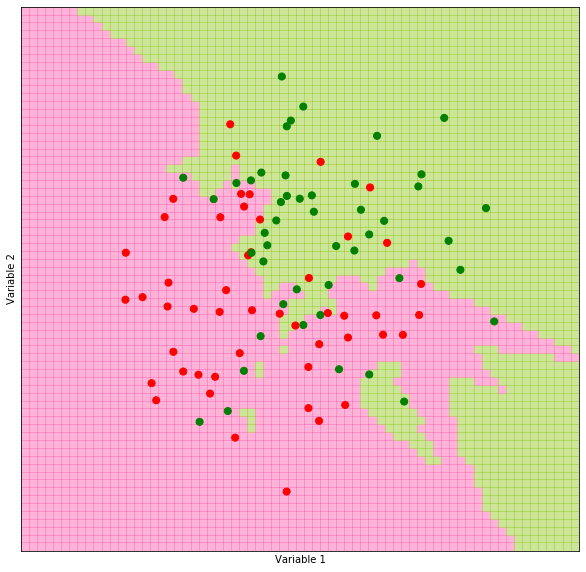

In [144]:
(predictors, outcomes)= generate_synth_data()
limits=(-3,4,-3,4); h=0.1; k=5; filename='knn.synth5.pdf'
(xx,yy,prediction_grid)=make_prediction_grid(predictors, outcomes,limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

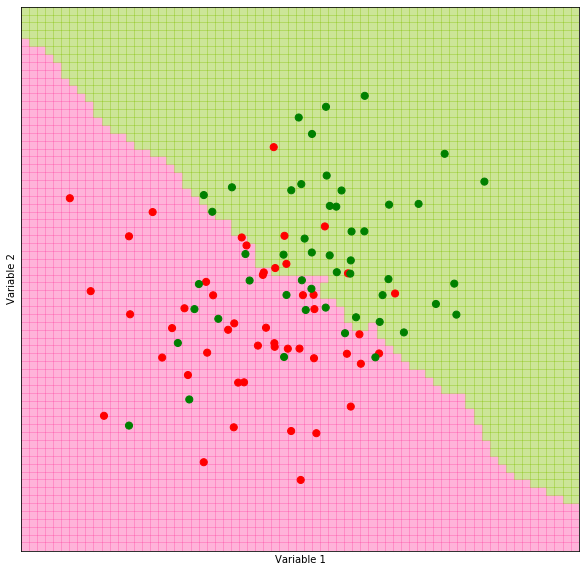

In [148]:
(predictors, outcomes)= generate_synth_data()
limits=(-3,4,-3,4); h=0.1; k=50; filename='knn.synth50.pdf'
(xx,yy,prediction_grid)=make_prediction_grid(predictors, outcomes,limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename) #more number of points to examine for one point so get majority, better
#since decision boundry smoother

In [149]:
#to be known a k value too small or large is not optimal since this needs to perform well under new data not one used alr.

In [150]:
from sklearn import datasets
iris=datasets.load_iris()

In [153]:
iris["data"] # 4 columns since 4 diff. coveriants: sepal length, sepal width, petal length, petal width

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [203]:
predictors=iris.data[:,:2] #all rows but for simplicity only using first 2 columns
outcomes=iris.target

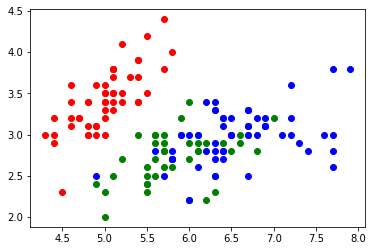

In [204]:
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro") #plot all rows and columns where outcomes is 0.
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")

In [160]:
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

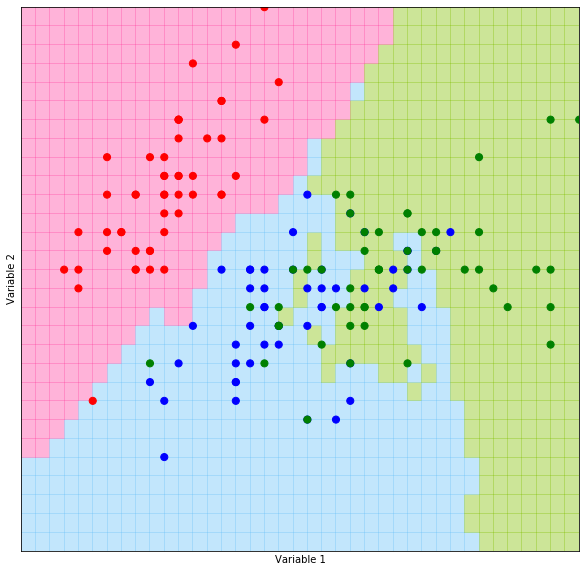

In [202]:
limits=(4,8,1.5,4.5); h=0.1; k=5; filename='iris.pdf'
(xx,yy,prediction_grid)=make_prediction_grid(predictors, outcomes,limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename) 

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
knn=KNeighborsClassifier(n_neighbors=5) #going to compare homemade algo with this one

In [185]:
knn.fit(predictors, outcomes)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [186]:
sk_predicitons=knn.predict(predictors)

In [187]:
sk_predicitons.shape

(150,)

In [188]:
sk_predicitons[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [205]:
my_predictions=np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors]) #my predictions

In [206]:
my_predictions.shape

(150, 1)

In [207]:
sk_predicitons==my_predictions

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False]])

In [208]:
100*np.mean(sk_predicitons==my_predictions) #where true is valued as 1 and false is valued as 0

33.324444444444445

In [209]:
#above value should be 96....

In [210]:
100*np.mean(sk_predicitons==outcomes)

83.33333333333334

In [211]:
100*np.mean(my_predictions==outcomes) #this should be 84.66666

33.33333333333333